# **Home task : Clustering, K-Means**

In [194]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns



## *Load data*

In [197]:
data = pd.read_csv("/Users/user/Desktop/Camp2025/lesson_12/datasets/Iris.csv", index_col='Id')
print(data.head())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa


In [199]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000    

## *Scale features*

In [201]:
features = data.drop(columns=['Species'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)

print(scaled_features_df.head())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                          
1       -0.900681      1.032057      -1.341272     -1.312977
2       -1.143017     -0.124958      -1.341272     -1.312977
3       -1.385353      0.337848      -1.398138     -1.312977
4       -1.506521      0.106445      -1.284407     -1.312977
5       -1.021849      1.263460      -1.341272     -1.312977


## *Determining the optimal number of clusters*

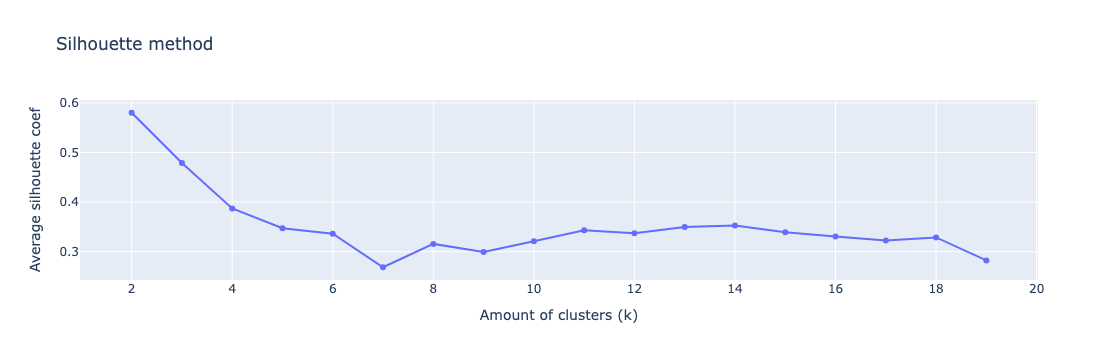

In [203]:
silhouette_avg_scores = []
k_range = range(2, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features_df)
    score = silhouette_score(scaled_features_df, labels)
    silhouette_avg_scores.append(score)

fig_score = px.line(
    x=list(k_range),
    y=silhouette_avg_scores,
    markers=True,
    labels={'x': 'Amount of clusters (k)', 'y': 'Average silhouette coef'},
    title='Silhouette method '
)
fig_score.show()

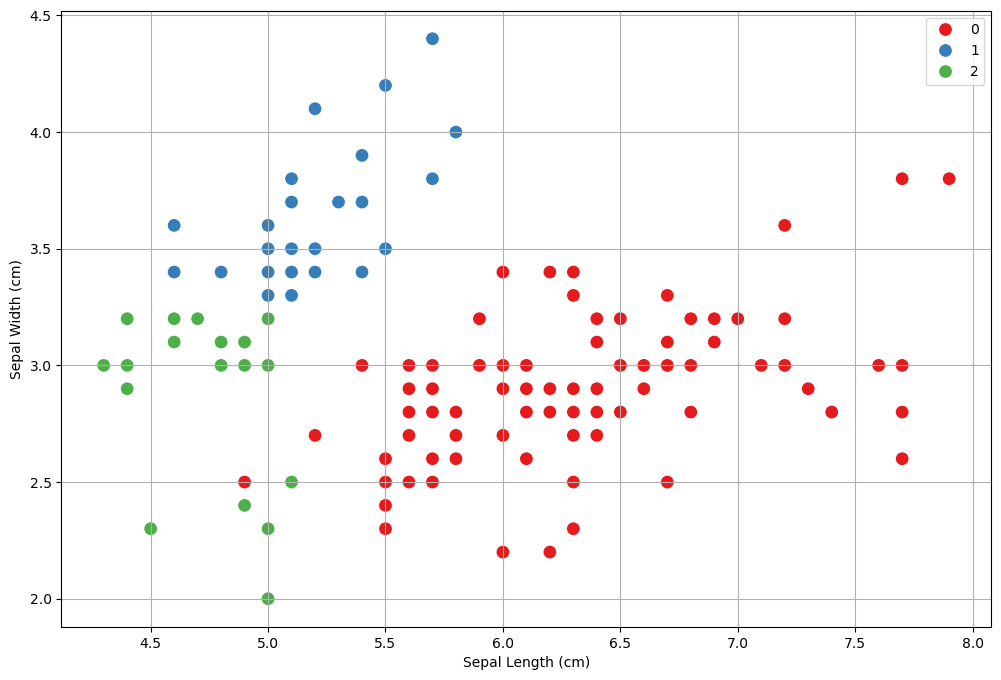

In [204]:
optimal_clusters = 3

kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans_model.fit_predict(scaled_features_df)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='cluster', palette='Set1', s=100)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend() 
plt.grid(True) 
plt.show()

